In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
import utils as ut
from models import Model
from layers import Linear, Flatten
from activation_functions import Sigmoid, Tanh, ReLU, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tqdm import tqdm
from collections import Counter

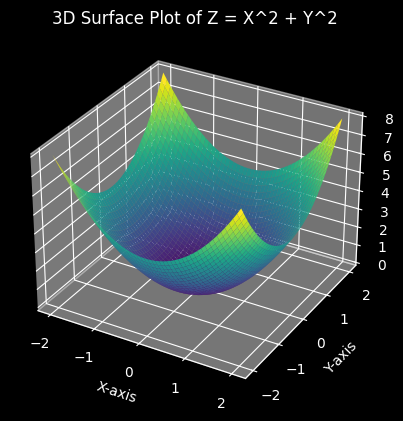

Shapes: X: (50, 50), Y: (50, 50), Z: (50, 50)
Shapes: X: (2500, 2), y: (2500,)
n_samples -> 2000
n_features -> 2
Shape of X_train -> (2000, 2)
Shape of y_train -> (2000, 1)


In [37]:
# z = x**2 + y**2 3D Paraboloid regression

# Create a 2D grid of points in the range [-2, 2]
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Calculate Z using the surface formula
Z = X**2 + Y**2  # shape: (50, 50)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("3D Surface Plot of Z = X^2 + Y^2")
plt.show()

print(f"Shapes: X: {X.shape}, Y: {Y.shape}, Z: {Z.shape}")

X = np.stack([X.ravel(), Y.ravel()], axis=1)
y = Z.ravel()
print(f"Shapes: X: {X.shape}, y: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# # Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"n_samples -> {X_train.shape[0]}")
print(f"n_features -> {X_train.shape[1]}")
print(f"Shape of X_train -> {X_train.shape}")
y_train_reshape = y_train.reshape(-1, 1)
y_train = y_train_reshape
print(f"Shape of y_train -> {y_train.shape}")

In [38]:
model = Model(ls.mse)
model.add(Linear(2, 12, ReLU()))  # Increase neurons and use Tanh
model.add(Linear(12, 24, ReLU()))
model.add(Linear(24, 12, ReLU()))
model.add(Linear(12, 1, None))
print(model)

loss, train_predictions, test_predictions = model.fit(
    (X_train, y_train),
    100,
    0.1,
    batch_size=32,
    logging_predictions=True,
)

Linear Layer (in 2, out 12), (activation relu)
Linear Layer (in 12, out 24), (activation relu)
Linear Layer (in 24, out 12), (activation relu)
Linear Layer (in 12, out 1), (activation None)
Training epoch 0
Epoch 0 loss -> 117.45649485320654
Training epoch 1
Epoch 1 loss -> 91.83560776241397
Training epoch 2
Epoch 2 loss -> 81.91343444850281
Training epoch 3
Epoch 3 loss -> 76.08949368440211
Training epoch 4
Epoch 4 loss -> 70.35344306773595
Training epoch 5
Epoch 5 loss -> 66.08118033062848
Training epoch 6
Epoch 6 loss -> 62.638512110121134
Training epoch 7
Epoch 7 loss -> 58.983025689949656
Training epoch 8
Epoch 8 loss -> 55.14417759335811
Training epoch 9
Epoch 9 loss -> 51.05112631756816
Training epoch 10
Epoch 10 loss -> 47.931700126427096
Training epoch 11
Epoch 11 loss -> 43.44273626504898
Training epoch 12
Epoch 12 loss -> 38.87932989068608
Training epoch 13
Epoch 13 loss -> 34.1229434269014
Training epoch 14
Epoch 14 loss -> 29.470199955545443
Training epoch 15
Epoch 15 loss

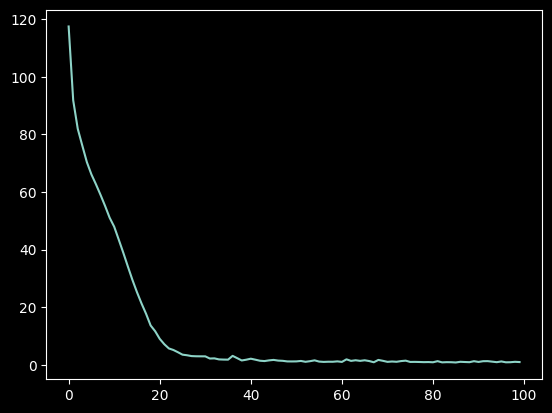

In [39]:
plt.plot(loss["train"], label="Train Loss")
plt.plot(loss["val"], label="Validation Loss")

In [41]:
# Test the model
predictions = model.predict(X_test)

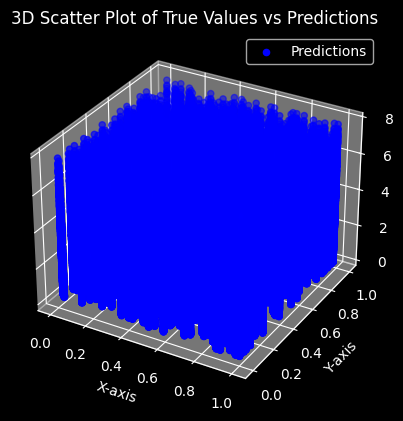

In [43]:
# Plot the predictions against X_test
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color="red", label="True Values")
ax.scatter(X_test[:, 0], X_test[:, 1], predictions, color="blue", label="Predictions")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("3D Scatter Plot of True Values vs Predictions")
plt.legend()
plt.show()